In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('data/cities_r2.csv')

In [17]:
print(df.isnull().sum())  # Check for missing values

# For simplicity, let's drop rows with missing values. Alternatively, we can fill with mean or mode
df = df.dropna()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


In [18]:
label_encoder = LabelEncoder()

# Encode categorical columns
df['state_name'] = label_encoder.fit_transform(df['state_name'])
df['location'] = label_encoder.fit_transform(df['location'])


In [19]:
X = df[['total_graduates']]  # We're focusing on total_graduates for clustering


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\chang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


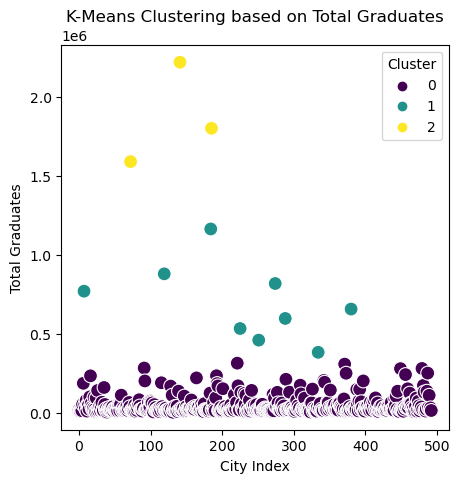

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df.index, y='total_graduates', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering based on Total Graduates')
plt.xlabel('City Index')
plt.ylabel('Total Graduates')
plt.legend(title='Cluster')
plt.show()

In [23]:
print(df[['name_of_city', 'total_graduates', 'Cluster']].sort_values(by='Cluster'))

           name_of_city  total_graduates  Cluster
0               Abohar             16287        0
336           Nalgonda             26575        0
335            Naihati             23181        0
333          Nagercoil             34342        0
332              Nagda              9844        0
..                  ...              ...      ...
288            Lucknow            596990        1
184  Greater Hyderabad           1164149        1
141              Delhi           2221137        2
185     Greater Mumbai           1802371        2
72            Bengaluru          1591163        2

[493 rows x 3 columns]
